In [ ]:
"""
GroupBy
Aggregation

"""

In [166]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
tips = pd.read_csv('data/tips.csv')

In [168]:
# Add tip % of total to DataFrame
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [169]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [170]:
# Group dataset by sex and smoker
grouped = tips.groupby(['sex', 'smoker'])

In [171]:
grouped_pct = grouped['tip_pct']

In [172]:
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [173]:
# We can do multiple aggregation functions
grouped_pct.agg(['mean', 'std'])

mean       std
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [174]:
# We can rename the columns
grouped_pct.agg([('Average', 'mean'), ('Standard Deviation', 'std')])

Average  Standard Deviation
sex    smoker                              
Female No      0.156921            0.036421
       Yes     0.182150            0.071595
Male   No      0.160669            0.041849
       Yes     0.152771            0.090588

In [175]:
# Can even do multiple functions on multiple columns
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)

In [176]:
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [177]:
# Can apply different functions to different columns
grouped.agg({'tip': 'max', 'size': 'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [178]:
# Applying multiple functions on some columns
grouped.agg({'tip_pct': ['min', 'max', 'mean', 'std'], 'size': 'sum'})

tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

In [179]:
# Function to return top n rows of df by given column
def top(df, n=5, column='tip_pct'):
    return df.sort_index(by=column, ascending=False)[:n]

In [180]:
top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525


In [181]:
# We can apply this function on groups too
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525

In [182]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [183]:
# PIVOT TABLES
# Aggregate a dataframe by one or more keys, arranging data with some of the group keys along rows and some along columns
tips.pivot_table(index=['sex', 'smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [184]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'], columns='smoker', margins=True)

tip_pct                          size                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   0.165296  0.209129  0.199388  2.500000  2.000000  2.111111
       Sat   0.147993  0.163817  0.156470  2.307692  2.200000  2.250000
       Sun   0.165710  0.237075  0.181569  3.071429  2.500000  2.944444
       Thur  0.155971  0.163073  0.157525  2.480000  2.428571  2.468750
Male   Fri   0.138005  0.144730  0.143385  2.000000  2.125000  2.100000
       Sat   0.162132  0.139067  0.151577  2.656250  2.629630  2.644068
       Sun   0.158291  0.173964  0.162344  2.883721  2.600000  2.810345
       Thur  0.165706  0.164417  0.165276  2.500000  2.300000  2.433333
All          0.159328  0.163196  0.160803  2.668874  2.408602  2.569672

In [185]:
# We can pass a different agg function
# This gets number of guests by sex, smoker, and day
tips.pivot_table(['size'], index=['sex', 'smoker'], columns='day', aggfunc='sum', fill_value=0, margins=True)

size                    
day            Fri  Sat  Sun Thur  All
sex    smoker                         
Female No        5   30   43   62  140
       Yes      14   33   10   17   74
Male   No        4   85  124   50  263
       Yes      17   71   39   23  150
All             40  219  216  152  627

In [186]:
# Verify pivot table above
tips[(tips['day'] == 'Fri') & (tips['sex'] == 'Female') & (tips['smoker'] == 'No')]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
94,22.75,3.25,Female,No,Fri,Dinner,2,0.142857
223,15.98,3.00,Female,No,Fri,Lunch,3,0.187735


In [187]:
# Get number of bills by sex, smoker, and day.
pd.crosstab([tips.sex, tips.smoker], tips.day, margins=True)

day            Fri  Sat  Sun  Thur  All
sex    smoker                          
Female No        2   13   14    25   54
       Yes       7   15    4     7   33
Male   No        2   32   43    20   97
       Yes       8   27   15    10   60
All             19   87   76    62  244

In [188]:
# Cross-Tabulation is a special case of a pivot table that computes group frequencies
# This gets number of bills by time, day and smoker.
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [191]:
# Get cross-tab by day and party size
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [81]:
# Filter out parties of 1 and 6 since so few
party_counts = party_counts.ix[:, 2:5]

In [82]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


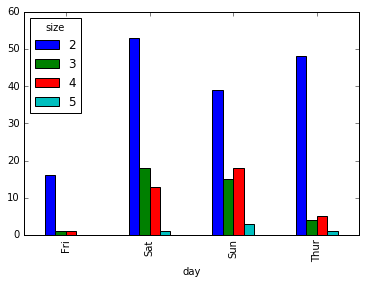

In [84]:
# BAR CHART
party_counts.plot(kind='bar')

In [85]:
# Normalize data
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)

In [86]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


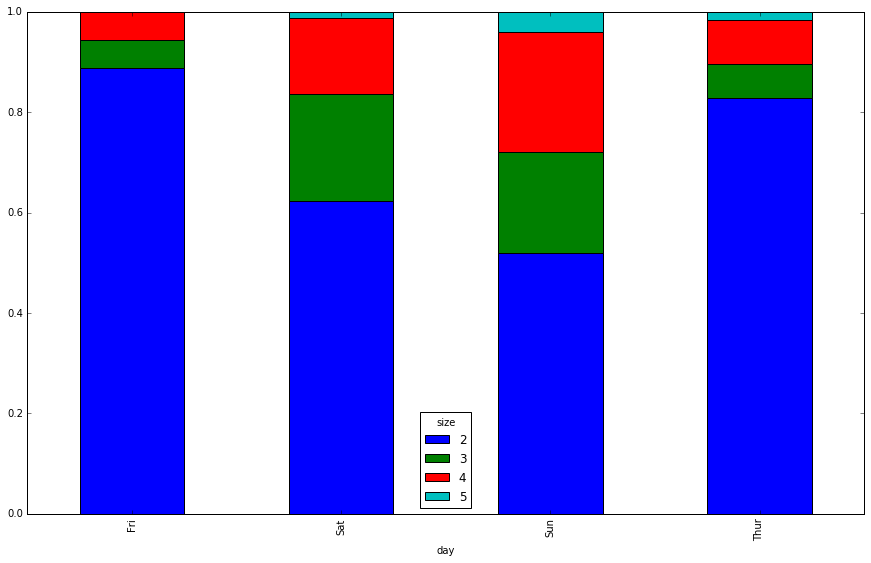

In [95]:
# NORMALIZED BAR CHART
party_pcts.plot(kind='bar', stacked=True, figsize=(15, 9))

In [89]:
# Add % tip column
tips['tip_pct'] = tips['tip'] / tips['total_bill']

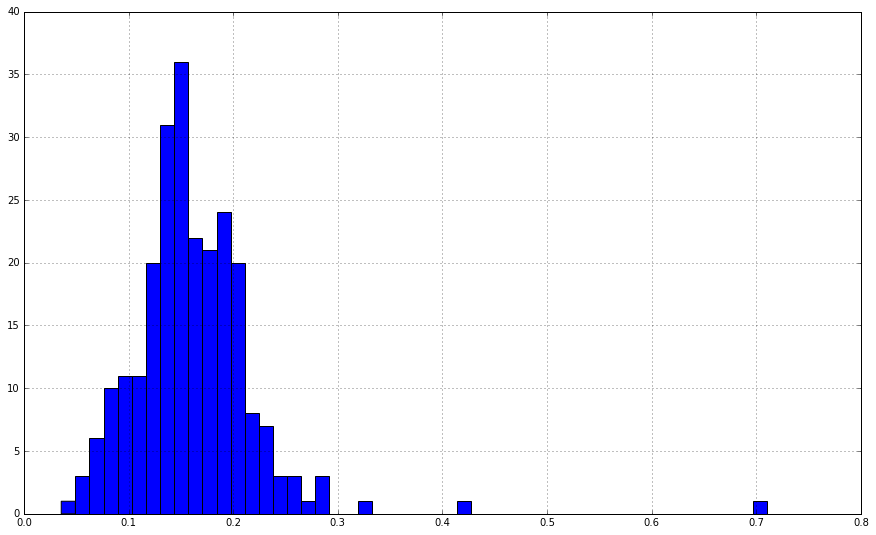

In [92]:
# HISTOGRAM
tips['tip_pct'].hist(bins=50, figsize=(15, 9))

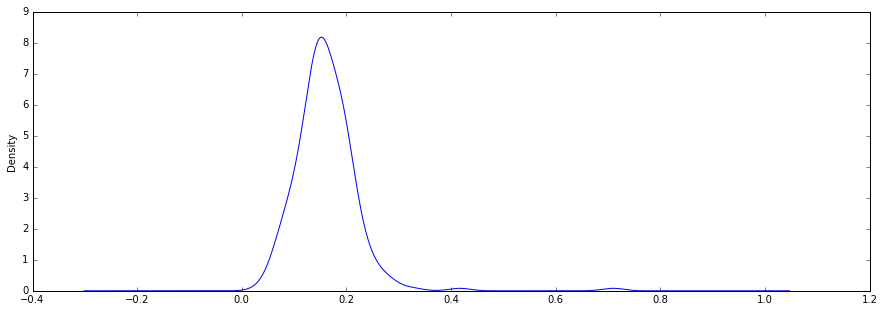

In [100]:
# DENSITY PLOT (KERNEL DENSITY ESTIMATE)
tips['tip_pct'].plot(kind='kde', figsize=(15, 5))

size
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
5    Axes(0.125,0.125;0.775x0.775)
6    Axes(0.125,0.125;0.775x0.775)
dtype: object

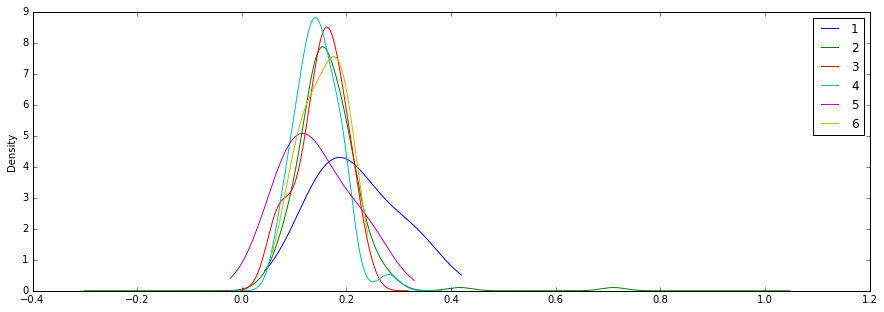

In [102]:
# Tip percentage density based on party size
tips['tip_pct'].groupby(tips['size']).plot(kind='kde', figsize=(15, 5), legend=True)

smoker
No     Axes(0.125,0.125;0.775x0.775)
Yes    Axes(0.125,0.125;0.775x0.775)
dtype: object

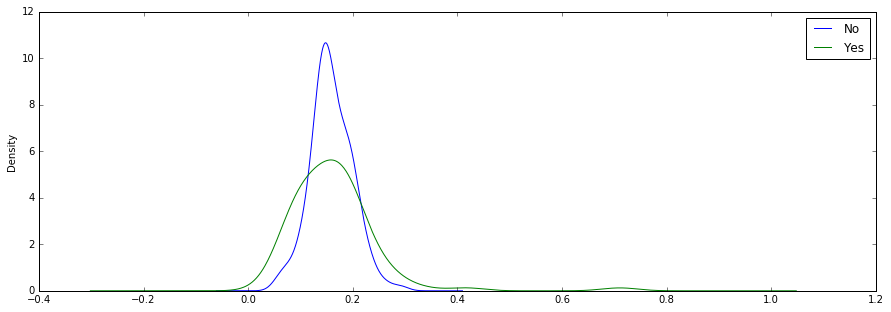

In [193]:
# Tipping density for smokers/non-smokers
tips['tip_pct'].groupby(tips.smoker).plot(kind='kde', figsize=(15, 5), legend=True)

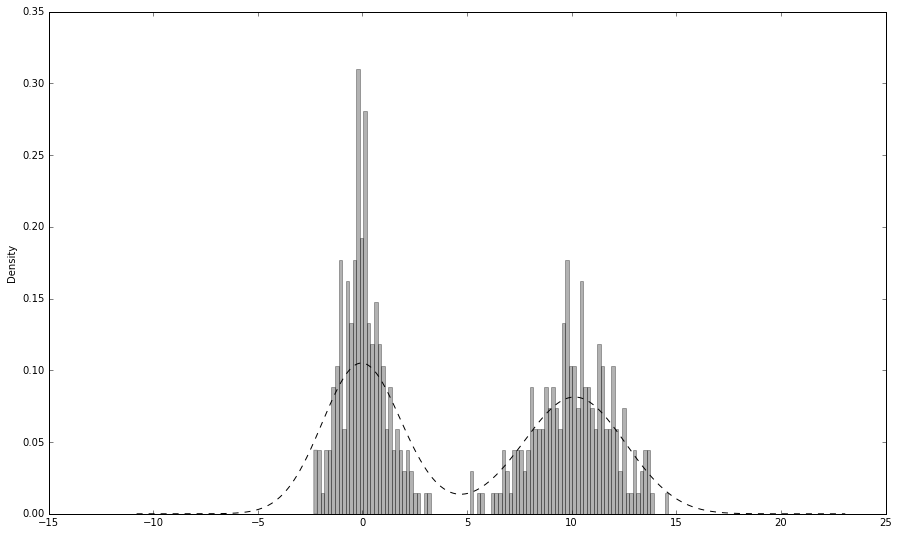

In [192]:
# Density plot of two normally distributed draws
draw_1 = np.random.normal(0, 1, size=200)
draw_2 = np.random.normal(10, 2, size=200)  # 2^2 = 4

values = pd.Series(np.concatenate([draw_1, draw_2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True, figsize=(15,9))
values.plot(kind='kde', style='k--', figsize=(15,9))